# KNN - 'K' Nearest Neighbors 



              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56538
           1       0.18      0.06      0.09      4965

    accuracy                           0.90     61503
   macro avg       0.55      0.52      0.52     61503
weighted avg       0.86      0.90      0.88     61503

AUC-ROC: 0.5709591285590809


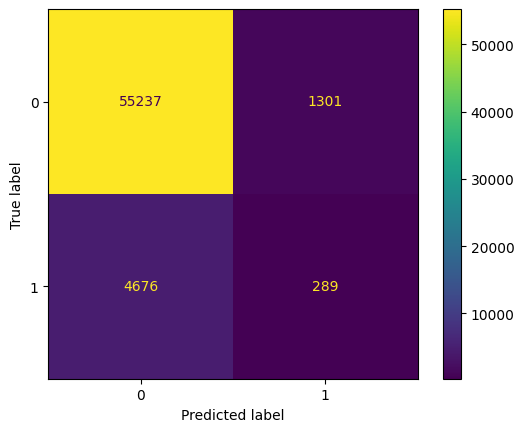

Distribuição antes do SMOTE: TARGET
0    226148
1     19860
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/home-credit/prepared/train.csv')

y = df['TARGET']  
X = df.drop(columns=['TARGET'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)  # pode ajustar depois
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

y_proba = knn.predict_proba(X_test)[:,1]
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

smote = SMOTE(random_state=42)
print("Distribuição antes do SMOTE:", y_train.value_counts())
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Distribuição depois do SMOTE:", y_train_smote.value_counts())

knn.fit(X_train_smote, y_train_smote)
y_pred_smote = knn.predict(X_test)
print("Após SMOTE:")
print(classification_report(y_test, y_pred_smote))